In [78]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras
from tensorflow.keras import datasets, layers, models
import sys
import pickle
import gzip
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [79]:
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    if sys.version_info < (3,):
        data = pickle.load(f)
    else:
        data = pickle.load(f, encoding='bytes')
    f.close()
    (X_train, Y_train), (X_test, Y_test) = data

    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    
    return (X_train/255, Y_train), (X_test/255, Y_test)


def init_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer="adam", 
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    return model


def model_train(X_train, Y_train, X_test, Y_test, model):
    history = mnist_model.fit(X_train[:1000], Y_train[:1000], epochs=20,
                    batch_size=128,
                    validation_data=(X_test, Y_test))
    return history


def exp_plots(history, model):
    plt.subplot(211)
    plt.plot(history.history['acc'], label='accuracy')
    plt.plot(history.history['val_acc'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    plt.subplot(212)
    plt.plot(history.history['loss'], label='accuracy')
    plt.plot(history.history['val_loss'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
    return test_loss, test_acc 

def confusion_mat(X_test, Y_test, model):
    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    Y_true = np.argmax(Y_test,axis = 1)
    confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, annot=True, fmt='g')


In [80]:
(X_train, Y_train), (X_test, Y_test) = load_data()

In [81]:
mnist_model = init_model()

mnist_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_31 (Dense)             (None, 10)              

In [82]:
evaluation = model_train(X_train, Y_train, X_test, Y_test, mnist_model)

Epoch 1/20
8/8 [==============================] - 1s 145ms/step - loss: 2.0356 - acc: 0.4140 - val_loss: 1.5287 - val_acc: 0.6099
Epoch 2/20
8/8 [==============================] - 1s 127ms/step - loss: 1.0557 - acc: 0.7490 - val_loss: 0.7552 - val_acc: 0.7522
Epoch 3/20
8/8 [==============================] - 1s 134ms/step - loss: 0.5760 - acc: 0.8120 - val_loss: 0.4960 - val_acc: 0.8368
Epoch 4/20
8/8 [==============================] - 1s 148ms/step - loss: 0.4255 - acc: 0.8730 - val_loss: 0.4402 - val_acc: 0.8648
Epoch 5/20
8/8 [==============================] - 1s 139ms/step - loss: 0.3520 - acc: 0.8990 - val_loss: 0.3576 - val_acc: 0.8916
Epoch 6/20
8/8 [==============================] - 1s 141ms/step - loss: 0.2609 - acc: 0.9270 - val_loss: 0.3338 - val_acc: 0.8891
Epoch 7/20
8/8 [==============================] - 1s 145ms/step - loss: 0.2237 - acc: 0.9360 - val_loss: 0.2952 - val_acc: 0.9088
Epoch 8/20
8/8 [==============================] - 1s 133ms/step - loss: 0.1868 - acc: 0.94

313/313 - 1s - loss: 0.1932 - acc: 0.9432


(0.19321437180042267, 0.9431999921798706)

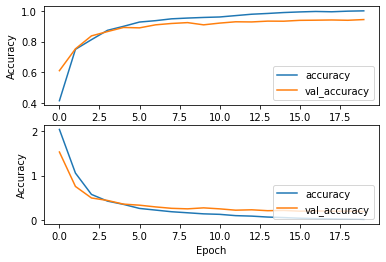

In [83]:
exp_plots(evaluation, mnist_model)

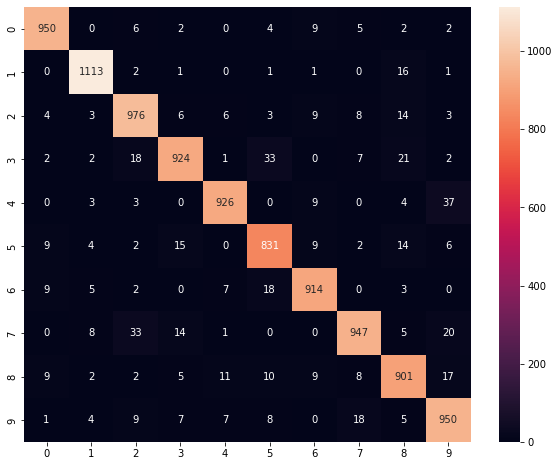

In [84]:
confusion_mat(X_test, Y_test, mnist_model)